## **Lab 1: Linear and logistic regression**

In [161]:
import matplotlib.pyplot as plt
import torch
import pandas as pd
import numpy as np
from typing import Union

from Demos.FileSecurityTest import calc_mask
from torch.utils.data import DataLoader, Dataset, TensorDataset

On file  C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\ipykernel_launcher.py 

OWNER
   ('Choi Soo Jong', 'LAPTOP-KDEK50V9', 1)
GROUP
   ('None', 'LAPTOP-KDEK50V9', 2)
ACE 0
  -Type
     ACCESS_ALLOWED_ACE_TYPE
  -Flags 0x0
  -mask 0x1f01ff
     DELETE
     READ_CONTROL
     WRITE_DAC
     WRITE_OWNER
     SYNCHRONIZE
     FILE_GENERIC_READ
     FILE_GENERIC_WRITE
     FILE_GENERIC_EXECUTE
     FILE_DELETE_CHILD
   Calculated Check Mask= 0x1f01ff
  -SID
     ('SYSTEM', 'NT AUTHORITY', 5)
ACE 1
  -Type
     ACCESS_ALLOWED_ACE_TYPE
  -Flags 0x0
  -mask 0x1f01ff
     DELETE
     READ_CONTROL
     WRITE_DAC
     WRITE_OWNER
     SYNCHRONIZE
     FILE_GENERIC_READ
     FILE_GENERIC_WRITE
     FILE_GENERIC_EXECUTE
     FILE_DELETE_CHILD
   Calculated Check Mask= 0x1f01ff
  -SID
     ('Administrators', 'BUILTIN', 4)
ACE 2
  -Type
     ACCESS_ALLOWED_ACE_TYPE
  -Flags 0x0
  -mask 0x1f01ff
     DELETE
     READ_CONTROL
     WRITE_DAC
     WRITE_OWNER
     SYNCHRONIZE


### **Linear Regression**

#### 1. Dataset

In [162]:
df_house = pd.read_csv('California_Houses.csv')
df_house.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [163]:
df_house.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


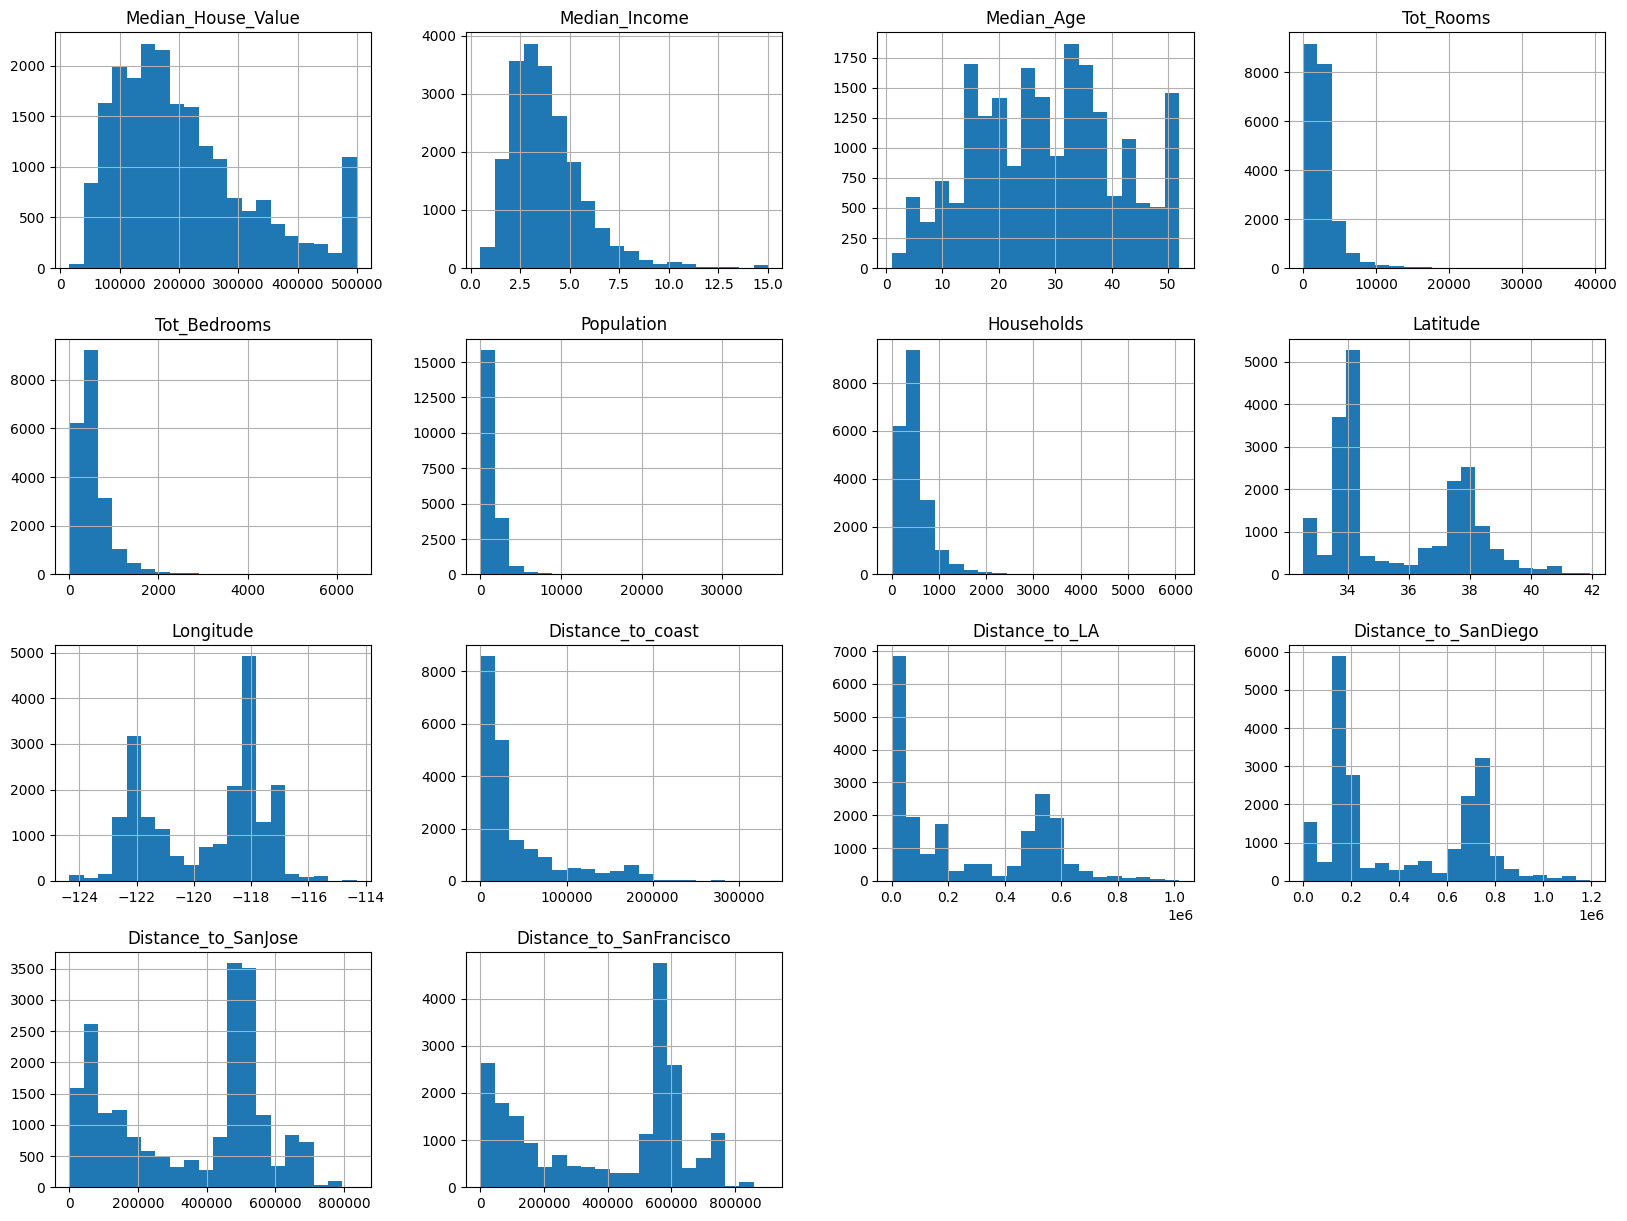

In [164]:
df_house.hist(bins=20, figsize=(20, 15))
plt.show()

In [165]:
df_titanic = pd.read_csv('Titanic-Dataset.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [166]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


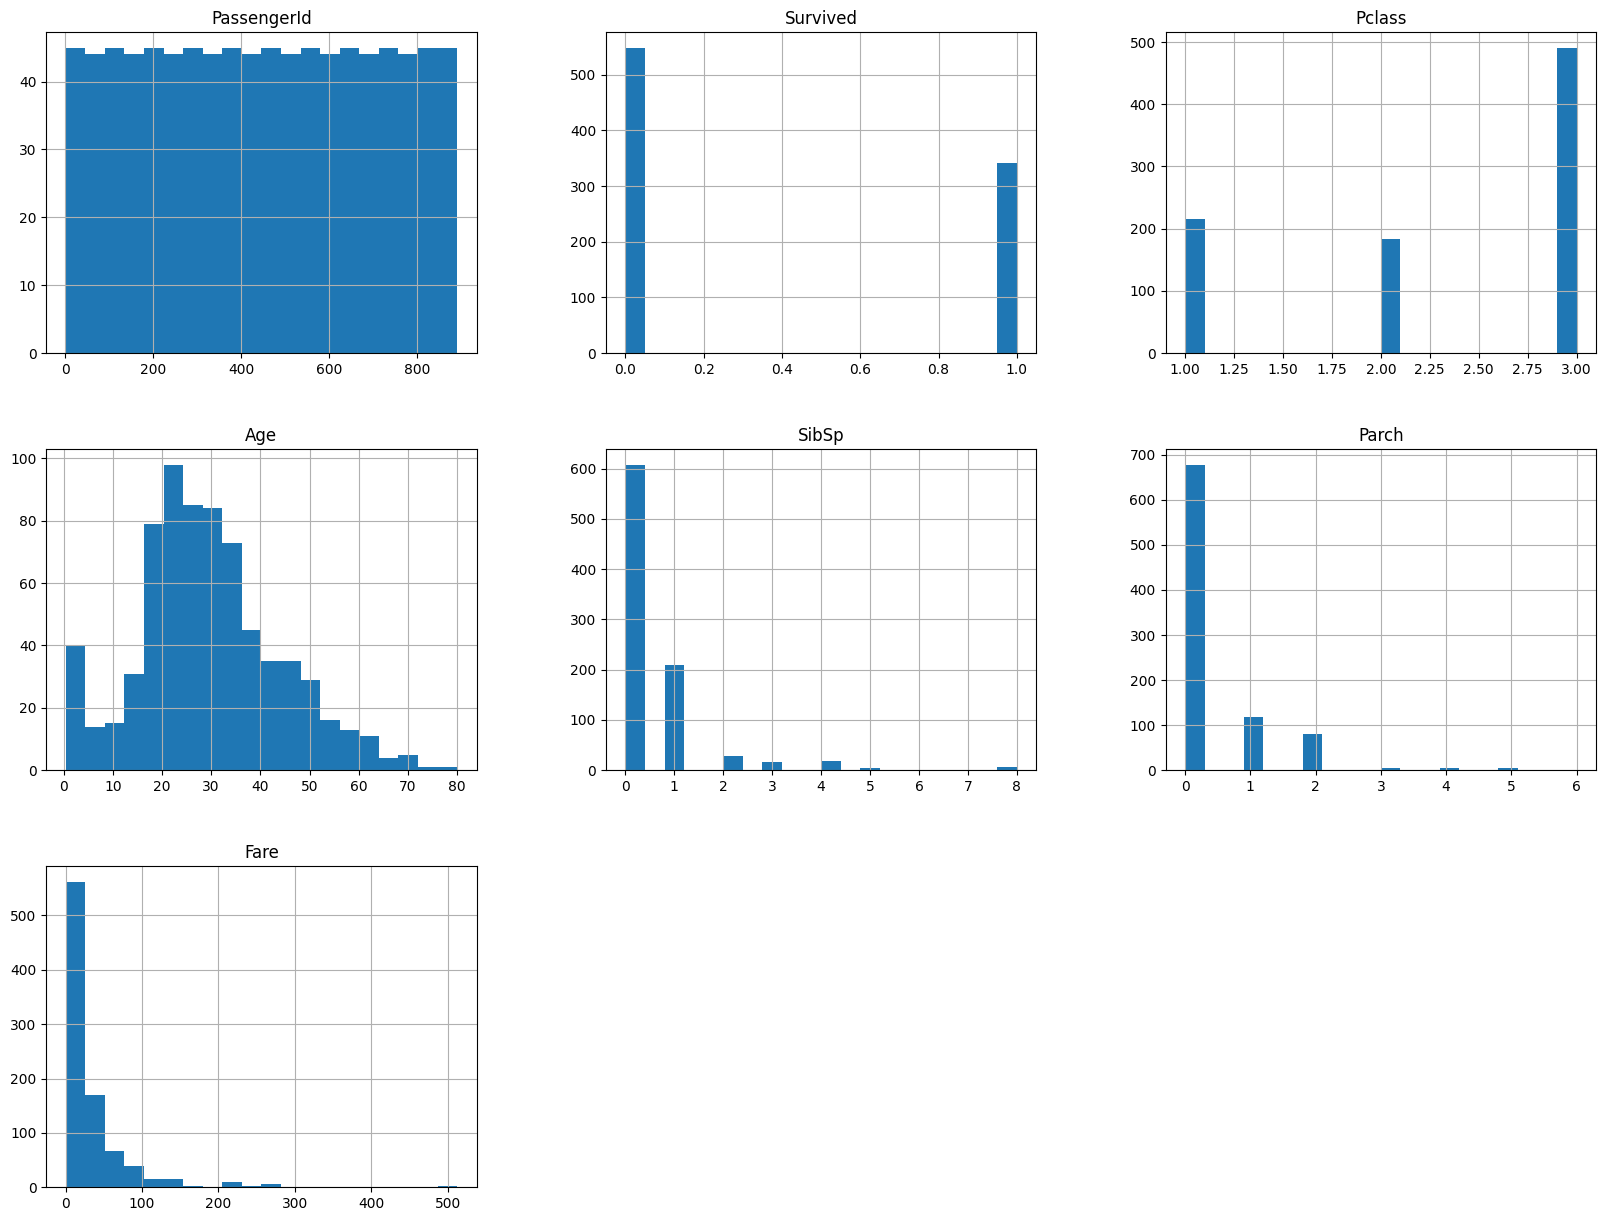

In [167]:
df_titanic.hist(bins=20, figsize=(20, 15))
plt.show()

In [168]:
plt.style.use('default')


def plot_correlation_matrix(data: Union[pd.DataFrame, np.ndarray],
                            title: str = "Correlation Matrix",
                            cmap: str = 'coolwarm',
                            figsize: tuple = (14, 10)) -> None:
    if not isinstance(data, (pd.DataFrame, np.ndarray)):
        raise TypeError("Input data must be a pandas DataFrame or numpy array")

    if isinstance(data, np.ndarray):
        data = pd.DataFrame(data)

    numeric_cols = data.select_dtypes(include=[np.number]).columns

    if len(numeric_cols) == 0:
        raise ValueError("No numerical columns found in the input data")

    corr_matrix = data[numeric_cols].corr().to_numpy()

    plt.figure(figsize=figsize)

    # Plot heatmap
    im = plt.imshow(corr_matrix, cmap=cmap, interpolation='nearest')
    plt.colorbar(im, label='Correlation Coefficient')

    plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45, ha='right')
    plt.yticks(range(len(numeric_cols)), numeric_cols)

    for i in range(len(numeric_cols)):
        for j in range(len(numeric_cols)):
            plt.text(j, i, f'{corr_matrix[i, j]:.2f}',
                     ha='center', va='center',
                     color='white' if abs(corr_matrix[i, j]) > 0.5 else 'black')
    plt.title(title)
    plt.tight_layout()

    plt.show()


### 2. Data Preprocessing

In [169]:
# Check null
df_house.isnull().any(axis=0)

Median_House_Value          False
Median_Income               False
Median_Age                  False
Tot_Rooms                   False
Tot_Bedrooms                False
Population                  False
Households                  False
Latitude                    False
Longitude                   False
Distance_to_coast           False
Distance_to_LA              False
Distance_to_SanDiego        False
Distance_to_SanJose         False
Distance_to_SanFrancisco    False
dtype: bool

In [170]:
df_titanic.isnull().any(axis=0)

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [171]:
df_titanic['Age'] = df_titanic['Age'].fillna(df_titanic['Age'].median())
df_titanic['Embarked'] = df_titanic['Embarked'].ffill()

selected_cols_titanic = df_titanic.drop(columns=['Cabin', 'Name', 'Ticket'])

In [172]:
selected_cols_titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [173]:
# Check duplicated data
selected_cols_house = df_house.drop_duplicates()
selected_cols_house.shape

(20640, 14)

In [174]:
selected_cols_titanic = selected_cols_titanic.drop_duplicates()
selected_cols_titanic.shape

selected_cols_titanic = pd.get_dummies(selected_cols_titanic, columns=['Sex', 'Embarked'], dtype='int64')
selected_cols_titanic['Age'] = pd.cut(selected_cols_titanic['Age'], 4, labels=['1', '2', '3', '4']).astype('int64')
selected_cols_titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,2,1,0,7.2500,0,1,0,0,1
1,2,1,1,2,1,0,71.2833,1,0,1,0,0
2,3,1,3,2,0,0,7.9250,1,0,0,0,1
3,4,1,1,2,1,0,53.1000,1,0,0,0,1
4,5,0,3,2,0,0,8.0500,0,1,0,0,1


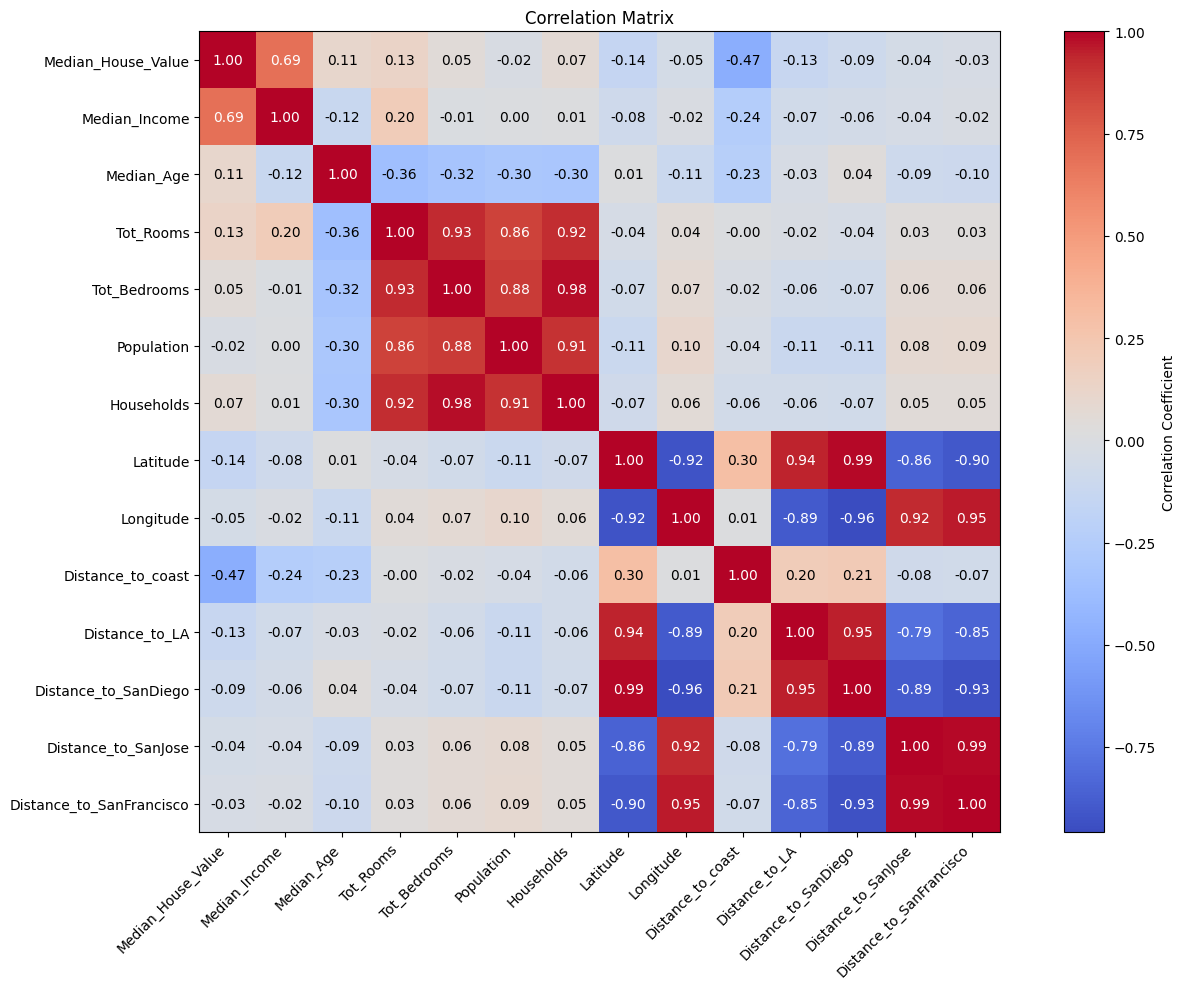

In [175]:
plot_correlation_matrix(selected_cols_house)

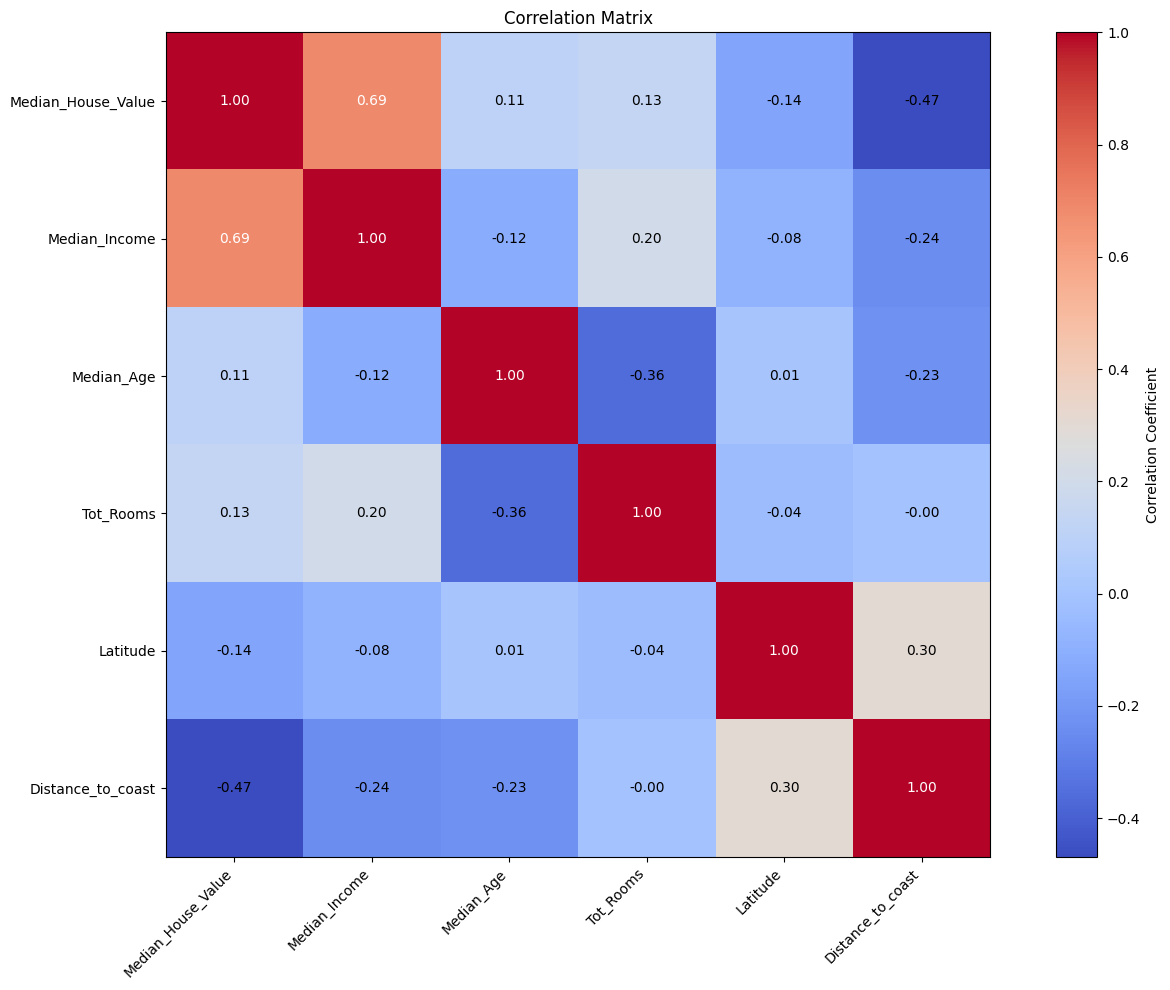

In [176]:
selected_cols_house = selected_cols_house.drop(columns=['Tot_Bedrooms', 'Population', 'Longitude',
                                                        'Households', 'Distance_to_LA',
                                                        'Distance_to_SanDiego', 'Distance_to_SanFrancisco',
                                                        'Distance_to_SanJose'])

plot_correlation_matrix(selected_cols_house)

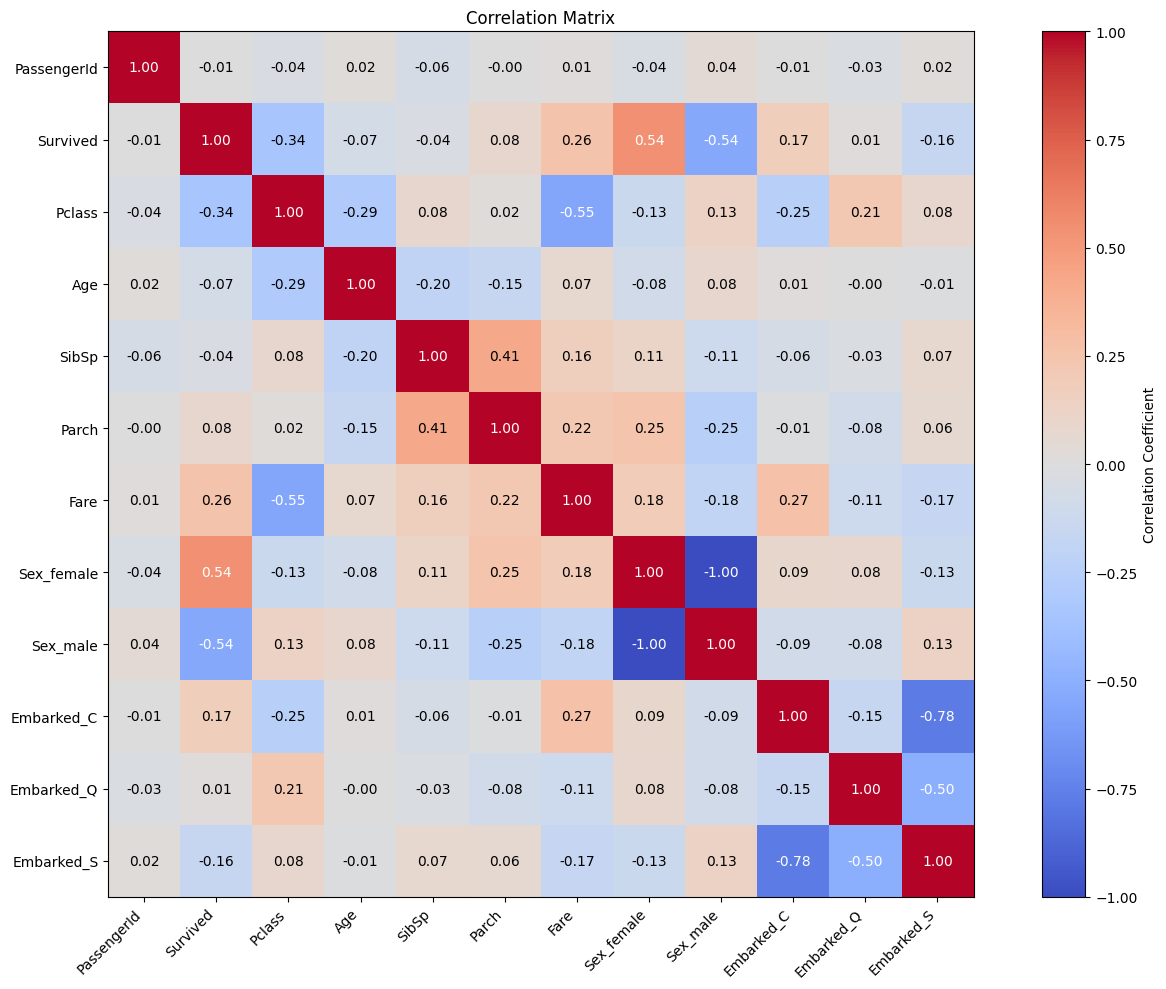

In [177]:
plot_correlation_matrix(selected_cols_titanic)

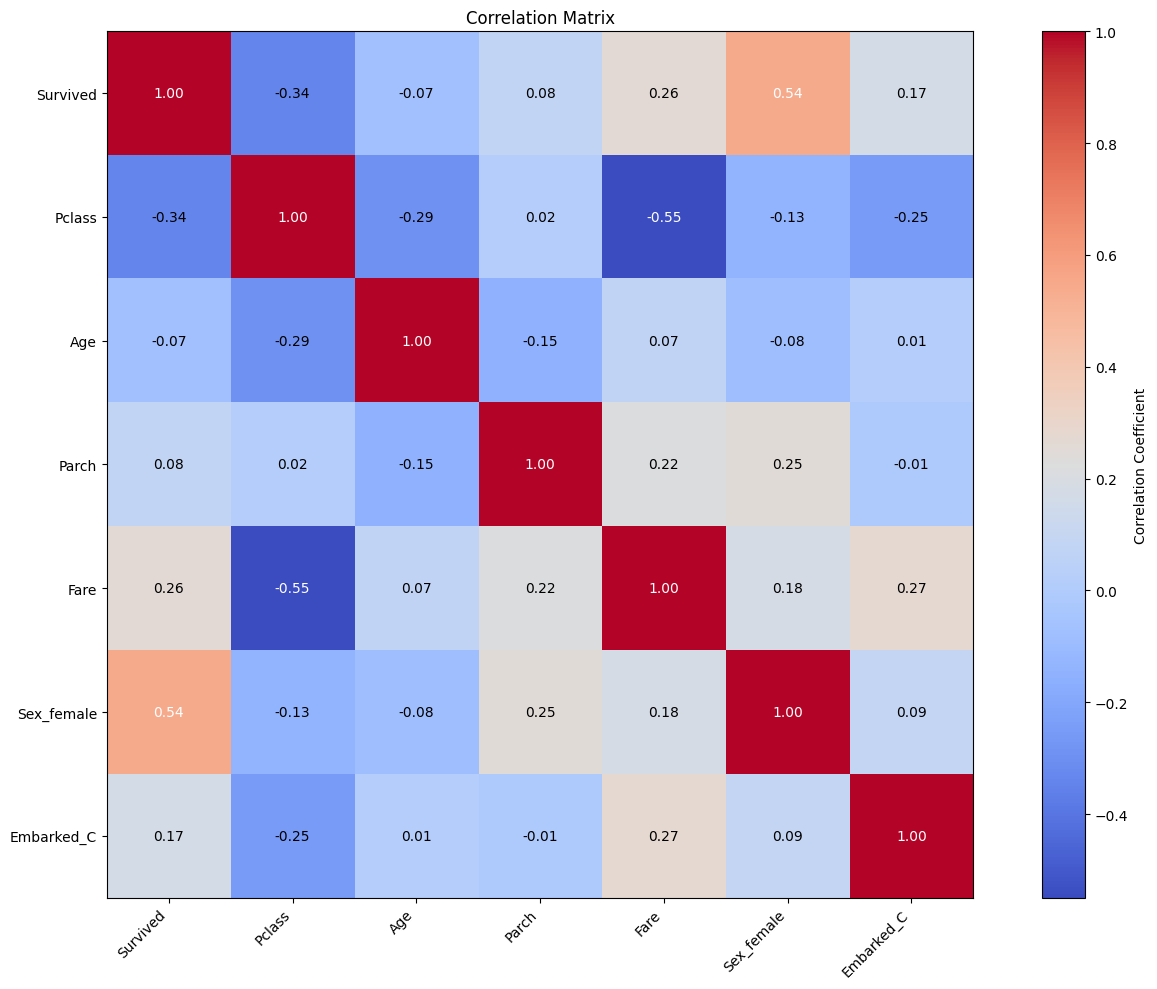

In [178]:
selected_cols_titanic = selected_cols_titanic.drop(
    columns=['PassengerId', 'SibSp', 'Sex_male', 'Embarked_Q', 'Embarked_S'])

plot_correlation_matrix(selected_cols_titanic)

In [179]:
selected_cols_house.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Latitude,Distance_to_coast
0,452600.0,8.3252,41,880,37.88,9263.040773
1,358500.0,8.3014,21,7099,37.86,10225.733072
2,352100.0,7.2574,52,1467,37.85,8259.085109
3,341300.0,5.6431,52,1274,37.85,7768.086571
4,342200.0,3.8462,52,1627,37.85,7768.086571


In [180]:
selected_cols_titanic.head()

,Survived,Pclass,Age,Parch,Fare,Sex_female,Embarked_C
0,0,3,2,0,7.2500,0,0
1,1,1,2,0,71.2833,1,1
2,1,3,2,0,7.9250,1,0
3,1,1,2,0,53.1000,1,0
4,0,3,2,0,8.0500,0,0


#### Data normalization

In [181]:
def normalize_data(df):
    normalized_df = df.copy()

    for col in normalized_df.columns:
        col_min = df[col].min()
        col_max = df[col].max()

        if col_max == col_min:
            normalized_df[col] = 0.0
        else:
            normalized_df[col] = 2 * (normalized_df[col] - col_min) / (col_max - col_min) - 1

    return normalized_df


In [182]:
selected_cols_house = normalize_data(selected_cols_house)
selected_cols_house.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Latitude,Distance_to_coast
0,0.804533,0.079337,0.568627,-0.955339,0.134963,-0.945203
1,0.416493,0.076054,-0.215686,-0.638995,0.130712,-0.939433
2,0.390101,-0.067944,1.000000,-0.925479,0.128587,-0.951221
3,0.345566,-0.290603,1.000000,-0.935297,0.128587,-0.954164
4,0.349277,-0.538448,1.000000,-0.917341,0.128587,-0.954164


#### Data Saving

In [183]:
X_columns = ['Median_Income', 'Median_Age', 'Tot_Rooms', 'Latitude', 'Distance_to_coast']

X_house = selected_cols_house[X_columns]
Y_house = selected_cols_house['Median_House_Value']

X_house.to_csv('in_house.csv', index=False)
Y_house.to_csv('out_house.csv', index=False)

In [184]:
X_columns = ['Pclass', 'Age', 'Parch', 'Fare', 'Sex_female', "Embarked_C"]

X_titanic = selected_cols_titanic[X_columns]
Y_titanic = selected_cols_titanic['Survived']

X_titanic.to_csv('in_titanic.csv', index=False)
Y_titanic.to_csv('out_titanic.csv', index=False)

### 3.  Models

In [185]:
class LinearRegression:

    def __init__(self, learning_rate: float = 0.01, num_iterations: int = 1000, regularization: str = None,
                 alpha: float = 0.01, l1_ratio: float = 0.5):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.train_metrics = []
        self.weights = None
        self.bias = None
        self.loss_his = []
        self.metric_his = []
        #Lab 2 task 1
        self.regularization = regularization
        self.alpha = alpha
        self.l1_ratio = l1_ratio

    def calc_metrics(self, y, y_pred):
        # MSE
        mse = torch.mean((y - y_pred) ** 2)

        # RMSE
        rmse = torch.sqrt(mse)

        # MAE
        mae = torch.mean(torch.abs(y - y_pred))

        # R²
        ss_total = torch.sum((y - torch.mean(y)) ** 2)
        ss_residual = torch.sum((y - y_pred) ** 2)
        r2 = 1 - (ss_residual / ss_total)

        return {
            'MSE': mse.item(),
            'RMSE': rmse.item(),
            'MAE': mae.item(),
            'R2': r2.item()
        }

    def fit(self, X: torch.Tensor, y: torch.Tensor) -> list:
        if not isinstance(X, torch.Tensor) or not isinstance(y, torch.Tensor):
            raise ValueError("X and y must be torch. Tensor objects")

        num_samples, num_features = X.shape
        self.weights = torch.randn((num_features, 1), dtype=torch.float32) * 0.01
        self.bias = torch.zeros(1, dtype=torch.float32)

        losses = []
        for epoch in range(self.num_iterations):
            y_pred = torch.matmul(X, self.weights) + self.bias

            mse_loss = torch.mean((y_pred - y) ** 2)
            # Lab 2 task 1
            reg_loss = 0

            self.loss_his.append(mse_loss.item())

            # Lab2 task 1: Add regularization
            if self.regularization == 'l2':
                reg_loss = self.alpha * torch.sum(self.weights ** 2)
            if self.regularization == 'l1':
                reg_loss = self.alpha * torch.sum(torch.abs(self.weights))
            if self.regularization == 'elasticnet':
                self.l1_ra

            grad_weights = (2 / num_samples) * torch.matmul(X.T, (y_pred - y))
            grad_bias = (2 / num_samples) * torch.sum(y_pred - y)

            self.weights -= self.learning_rate * grad_weights
            self.bias -= self.learning_rate * grad_bias

            train_metrics = self.calc_metrics(y, y_pred)
            self.metric_his.append(train_metrics)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Loss={mse_loss.item()}, R²={train_metrics['R2']}")

    def predict(self, X: torch.Tensor) -> torch.Tensor:
        if self.weights is None or self.bias is None:
            raise ValueError("Model must be trained before making predictions")
        if not isinstance(X, torch.Tensor):
            raise ValueError("Input X must be a torch.Tensor")

        return torch.matmul(X, self.weights) + self.bias

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        metrics = self.calc_metrics(y, y_pred)
        return metrics


In [186]:
class LogisticRegression:

    def __init__(self, learning_rate: float = 0.01, num_iterations: int = 1000):
        if learning_rate <= 0:
            raise ValueError("Learning rate must be positive.")
        if num_iterations <= 0:
            raise ValueError("Number of iterations must be positive.")

        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.loss_his = []
        self.metric_his = []

    def _sigmoid(self, z: torch.Tensor) -> torch.Tensor:
        z = torch.clamp(z, -10, 10)
        return 1 / (1 + torch.exp(-z))

    def binary_cross_entropy(self, y_true: torch.Tensor, y_pred_proba: torch.Tensor) -> torch.Tensor:
        epsilon = 1e-8
        y_pred_proba = torch.clamp(y_pred_proba, epsilon, 1 - epsilon)
        return -torch.mean(y_true * torch.log(y_pred_proba) + (1 - y_true) * torch.log(1 - y_pred_proba))

    def calc_metrics(self, y_true: torch.Tensor, y_pred_proba: torch.Tensor) -> dict:
        y_pred_class = (y_pred_proba > 0.5).float()

        accuracy = torch.mean((y_pred_class == y_true).float())

        true_positives = torch.sum((y_pred_class == 1) & (y_true == 1))
        predicted_positives = torch.sum(y_pred_class == 1)
        actual_positives = torch.sum(y_true == 1)

        precision = true_positives / (predicted_positives + 1e-8)
        recall = true_positives / (actual_positives + 1e-8)
        f1 = 2 * (precision * recall) / (precision + recall + 1e-8)

        loss = self.binary_cross_entropy(y_true, y_pred_proba)

        return {
            'accuracy': accuracy.item(),
            'precision': precision.item(),
            'recall': recall.item(),
            'f1': f1.item(),
            'loss': loss.item()
        }

    def fit(self, X: torch.Tensor, y: torch.Tensor) -> None:
        if not isinstance(X, torch.Tensor) or not isinstance(y, torch.Tensor):
            raise ValueError("Inputs X and y must be torch.Tensor objects.")
        if X.ndim != 2 or y.ndim != 2:
            raise ValueError("X must be 2D and y must be 2D (num_samples, 1).")
        if X.shape[0] != y.shape[0]:
            raise ValueError("Number of samples in X and y must match.")
        if y.shape[1] != 1:
            raise ValueError("y must have shape (num_samples, 1).")

        num_samples, num_features = X.shape

        self.weights = torch.randn(num_features, 1, dtype=torch.float32) * 0.01
        self.bias = torch.zeros(1, dtype=torch.float32)

        for epoch in range(self.num_iterations):
            linear_output = torch.matmul(X, self.weights) + self.bias
            y_pred_proba = self.sigmoid(linear_output)

            loss = self.binary_cross_entropy(y, y_pred_proba)
            self.loss_his.append(loss.item())

            error = y_pred_proba - y
            dw = torch.matmul(X.T, error) / num_samples
            db = torch.sum(error) / num_samples

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if epoch % 10 == 0:
                metrics = self.calc_metrics(y, y_pred_proba)
                self.metric_his.append(metrics)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Loss={loss.item():.4f}, "
                      f"Accuracy={metrics['accuracy']:.4f}, F1={metrics['f1']:.4f}")

    def predict_proba(self, X: torch.Tensor) -> torch.Tensor:
        if self.weights is None or self.bias is None:
            raise ValueError("Model must be trained before prediction.")
        if X.shape[1] != self.weights.shape[0]:
            raise ValueError("Input feature dimension must match model weights.")

        return self.sigmoid(torch.matmul(X, self.weights) + self.bias)

    def predict(self, X: torch.Tensor, threshold: float = 0.5) -> torch.Tensor:
        probabilities = self.predict_proba(X)
        return (probabilities > threshold).float()

    def evaluate(self, X: torch.Tensor, y: torch.Tensor) -> dict:
        if y.shape[1] != 1:
            raise ValueError("y must have shape (num_samples, 1).")
        y_pred_proba = self.predict_proba(X)
        return self.calc_metrics(y, y_pred_proba)

### 4. Model Training

In [187]:
X_house = pd.read_csv('in_house.csv').values
y_house = pd.read_csv('out_house.csv').values

X_house = torch.tensor(X_house, dtype=torch.float32)
y_house = torch.tensor(y_house, dtype=torch.float32)

train_size = int(0.8 * len(X_house))
X_h_train, X_h_test = X_house[:train_size], X_house[train_size:]
y_h_train, y_h_test = y_house[:train_size], y_house[train_size:]

model = LinearRegression(0.01, 1000)

model.fit(X_h_train, y_h_train)

losses = model.loss_his

Epoch 0: Loss=0.26076430082321167, R²=-0.18995201587677002
Epoch 100: Loss=0.17812833189964294, R²=0.18714267015457153
Epoch 200: Loss=0.1526612788438797, R²=0.30335718393325806
Epoch 300: Loss=0.1361805945634842, R²=0.3785638213157654
Epoch 400: Loss=0.12508846819400787, R²=0.4291808009147644
Epoch 500: Loss=0.11738478392362595, R²=0.46433520317077637
Epoch 600: Loss=0.11190368235111237, R²=0.4893472194671631
Epoch 700: Loss=0.10793211311101913, R²=0.5074708461761475
Epoch 800: Loss=0.1050141453742981, R²=0.5207864046096802
Epoch 900: Loss=0.10284671932458878, R²=0.530677080154419


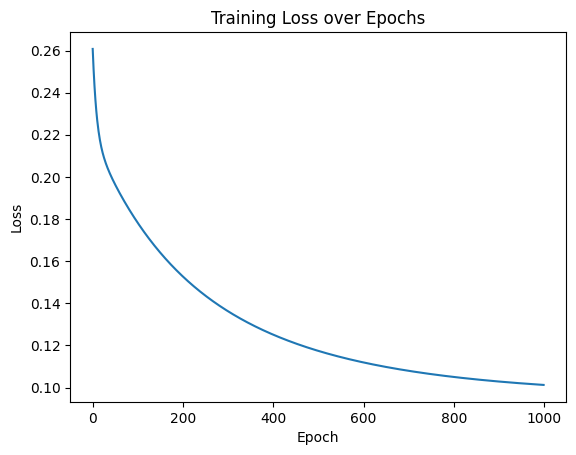

In [188]:
plt.plot(losses)
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [189]:
y_train_pred = model.predict(X_h_train)
metrics_train = model.calc_metrics(y_h_train, y_train_pred)

y_test_pred = model.predict(X_h_test)
metrics_test = model.calc_metrics(y_h_test, y_test_pred)

print("Training Metrics:")

Training Metrics:


### 5. Model evaluation

In [190]:
train_predictions = model.predict(X_h_train)
train_metrics = model.calc_metrics(y_h_train, train_predictions)

test_predictions = model.predict(X_h_test)
test_metrics = model.calc_metrics(y_h_test, test_predictions)

print("Training Metrics:")
print(f"MSE: {train_metrics['MSE']}")
print(f"RMSE: {train_metrics['RMSE']}")
print(f"MAE: {train_metrics['MAE']}")
print(f"R²: {train_metrics['R2']}")

print("\nTest Metrics:")
print(f"MSE: {test_metrics['MSE']}")
print(f"RMSE: {test_metrics['RMSE']}")
print(f"MAE: {test_metrics['MAE']}")
print(f"R²: {test_metrics['R2']}")

Training Metrics:
MSE: 0.1012222170829773
RMSE: 0.31815439462661743
MAE: 0.23735639452934265
R²: 0.5380902290344238

Test Metrics:
MSE: 0.10390686988830566
RMSE: 0.32234588265419006
MAE: 0.23266880214214325
R²: 0.5806617140769958


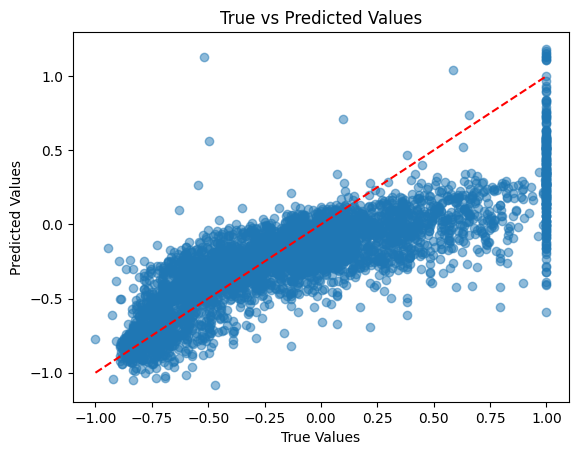

In [191]:
plt.scatter(y_h_test.detach().numpy(), test_predictions.detach().numpy(), alpha=0.5)
plt.plot([y_h_test.min(), y_h_test.max()], [y_h_test.min(), y_h_test.max()], 'r--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()